# Load Data And Fine Na

In [16]:
import time
import pandas as pd

print("Loading data file now, this could take a while depending on file size")
start = time.time()
df = pd.read_csv('cuisines.csv') # ADD-CSV
end = time.time()
print("Loading took " + str(round(end - start, 2)) + " seconds")
missing_values = df.isna().sum().sum()
duplicated_values = df.duplicated().sum()
print(f'\nMissing values: {missing_values}')
print(f'Duplicated values: {duplicated_values}')
if missing_values >= 1:
    print('\nMissing values by column:')
    print(df.isna().sum())
print("\nUnique Values in Each Column:")
print(df.nunique())

Loading data file now, this could take a while depending on file size
Loading took 0.06 seconds

Missing values: 0
Duplicated values: 0

Unique Values in Each Column:
Unnamed: 0    2448
cuisine          5
almond           2
angelica         1
anise            2
              ... 
wood             1
yam              2
yeast            2
yogurt           2
zucchini         2
Length: 385, dtype: int64


## แยกข้อมูล ตัวเลขและStr

In [17]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)


Numerical Columns: ['Unnamed: 0', 'almond', 'angelica', 'anise', 'anise_seed', 'apple', 'apple_brandy', 'apricot', 'armagnac', 'artemisia', 'artichoke', 'asparagus', 'avocado', 'bacon', 'baked_potato', 'balm', 'banana', 'barley', 'bartlett_pear', 'basil', 'bay', 'bean', 'beech', 'beef', 'beef_broth', 'beef_liver', 'beer', 'beet', 'bell_pepper', 'bergamot', 'berry', 'bitter_orange', 'black_bean', 'black_currant', 'black_mustard_seed_oil', 'black_pepper', 'black_raspberry', 'black_sesame_seed', 'black_tea', 'blackberry', 'blackberry_brandy', 'blue_cheese', 'blueberry', 'bone_oil', 'bourbon_whiskey', 'brandy', 'brassica', 'bread', 'broccoli', 'brown_rice', 'brussels_sprout', 'buckwheat', 'butter', 'buttermilk', 'cabbage', 'cabernet_sauvignon_wine', 'cacao', 'camembert_cheese', 'cane_molasses', 'caraway', 'cardamom', 'carnation', 'carob', 'carrot', 'cashew', 'cassava', 'catfish', 'cauliflower', 'caviar', 'cayenne', 'celery', 'celery_oil', 'cereal', 'chamomile', 'champagne_wine', 'chayote'

### หาการกระจากตัวของข้อมูล
เส้นกลางกล่อง: ค่ามัธยฐาน (Median)

กรอบกล่อง (IQR): แสดงช่วงระหว่างควอไทล์ที่ 1 (25%) และควอไทล์ที่ 3 (75%)

เส้นขีด: แสดงค่าข้อมูลที่อยู่ในช่วงไม่เกิน 1.5 เท่าของ IQR

จุด (Outliers): ค่าที่อยู่ไกลเกินกว่า 1.5 เท่าของ IQR

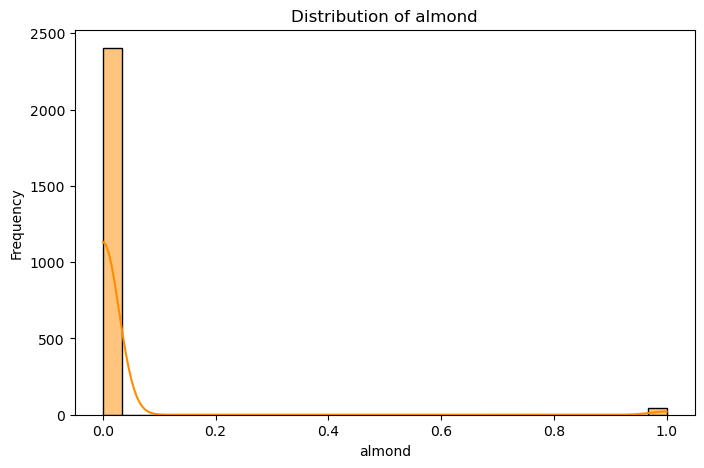

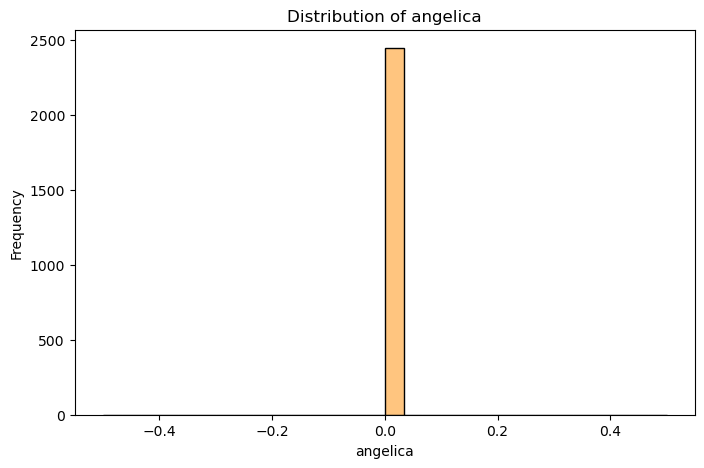

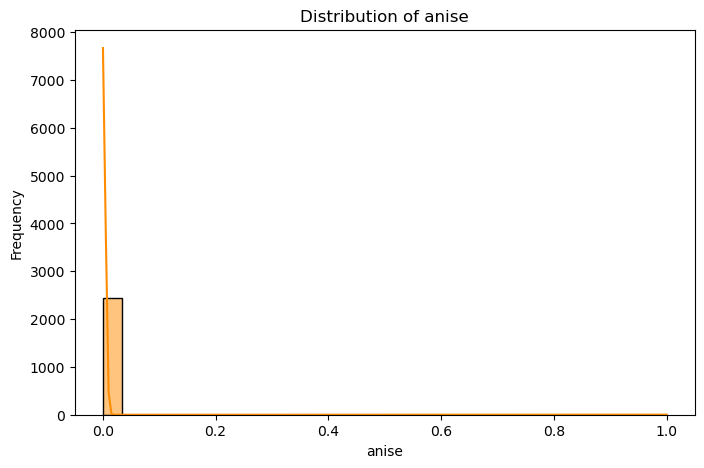

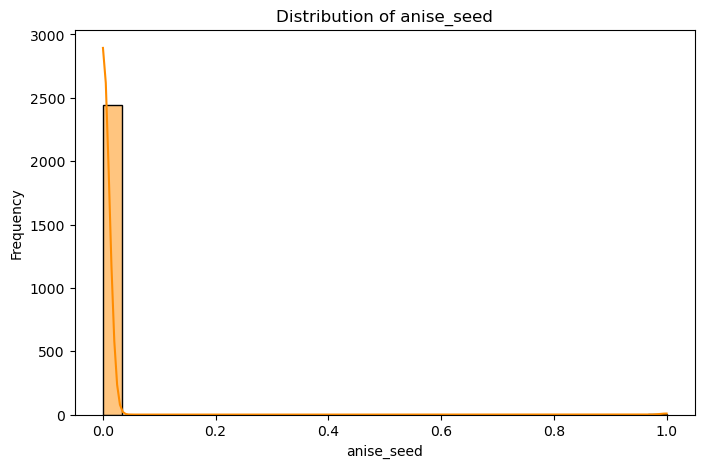

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_histograms(df, numerical_columns):
    for column in numerical_columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[column], bins=30, kde=True, color='#ff8c00')  
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()


numerical_columns = ['almond', 'angelica', 'anise', 'anise_seed']
plot_histograms(df, numerical_columns)

## หาความสัมพันธ์ของข้อมูลตัวเลข

จะดูแค่จากฝั่งซ้ายล่าง ถ้ามีความสัมพันธ์กันจะมีค่าใกล้ 1 ขึ้น แต่ถ้าไม่เกี่ยวข้องกันเลยจะมีค่าใกล้ -1

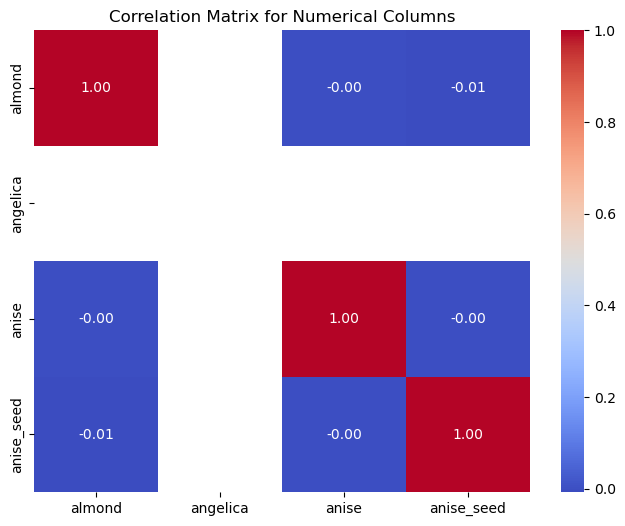

In [19]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

## ดูเนื้อหาประเภทหมวดหมู่

In [20]:
print("\nUnique Values in Each Column:")
print(df.nunique())


Unique Values in Each Column:
Unnamed: 0    2448
cuisine          5
almond           2
angelica         1
anise            2
              ... 
wood             1
yam              2
yeast            2
yogurt           2
zucchini         2
Length: 385, dtype: int64


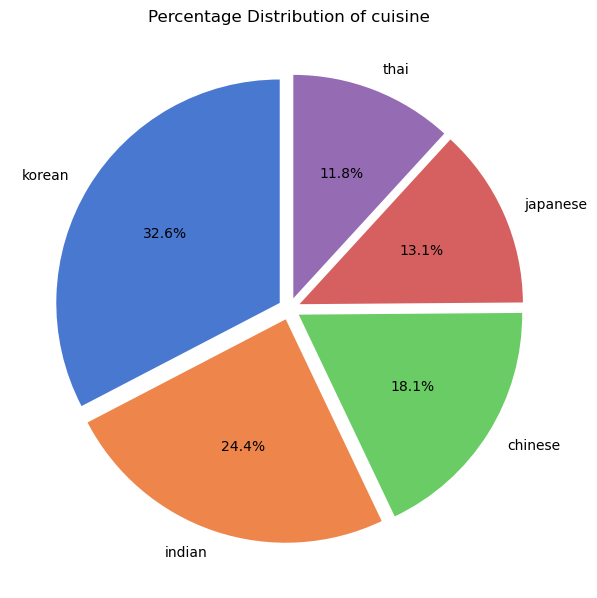

['almond', 'angelica', 'anise', 'anise_seed']

In [21]:
def plot_categorical_distributions(Categorical_Columns, data=df, palette='muted'):
    plt.figure(figsize=(15, 6))  
    
    for i, column_name in enumerate(Categorical_Columns):
        plt.subplot(1, 3, i + 1)  
        value_counts = data[column_name].value_counts()
        value_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette
                            (palette), startangle=90, explode=[0.05] * value_counts.nunique())
        
        plt.title(f'Percentage Distribution of {column_name}')
        plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()
    print(df[Categorical_Columns].value_counts())


columns_to_plot = ['cuisine']
plot_categorical_distributions(columns_to_plot)

numerical_columns

### ดูความถี่จำพวกหมวดหมู่

C:\Users\Acer\AppData\Local\Temp\ipykernel_3972\2695009371.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_data.index, y=avg_data.values, palette='muted')
C:\Users\Acer\AppData\Local\Temp\ipykernel_3972\2695009371.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=Categorical_Columns, y=Numerical_Columns, data=data, palette='muted')
C:\Users\Acer\AppData\Local\Temp\ipykernel_3972\2695009371.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=Categorical_Columns, y=Numerical_Columns, data=data, palette='muted')


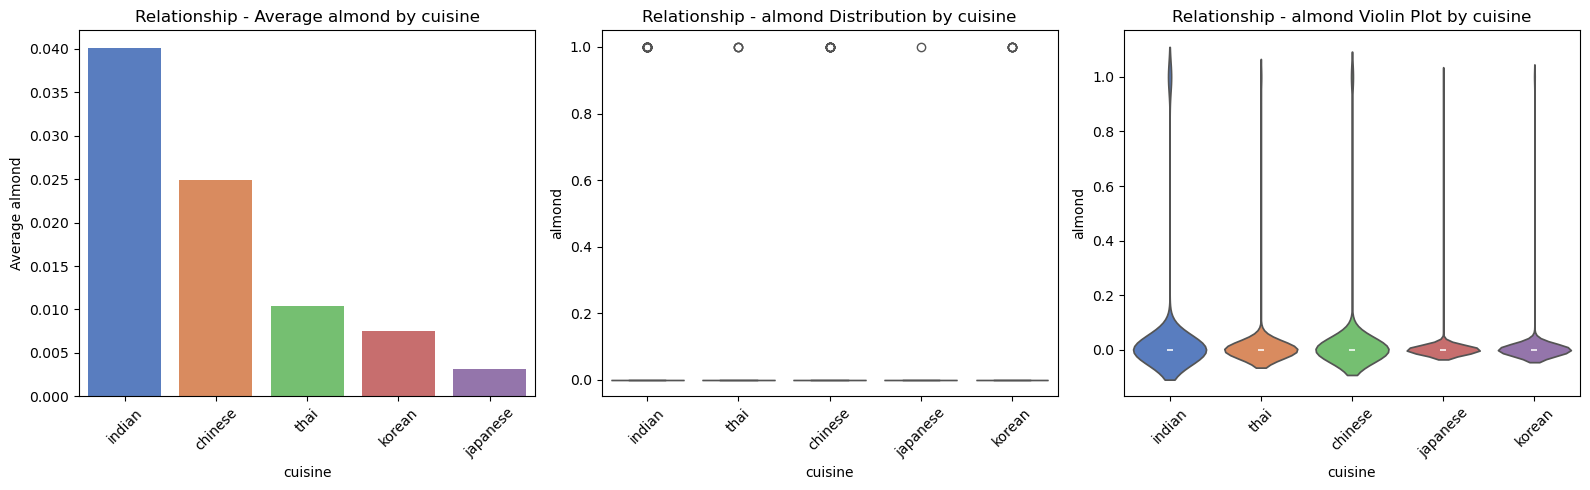

In [22]:
# Define a function to create bar plots, boxplots, and violin plots for relationships between a categorical variable and TransactionAmount
def plot_categorical_relationships(Categorical_Columns='column', data=df, Numerical_Columns='', title_prefix='Relationship'):
    plt.figure(figsize=(16, 5))

    # Bar Plot
    plt.subplot(1, 3, 1)
    avg_data = data.groupby(Categorical_Columns)[Numerical_Columns].mean().sort_values(ascending=False)
    sns.barplot(x=avg_data.index, y=avg_data.values, palette='muted')
    plt.title(f'{title_prefix} - Average {Numerical_Columns} by {Categorical_Columns}')
    plt.xlabel(Categorical_Columns)
    plt.ylabel(f'Average {Numerical_Columns}')
    plt.xticks(rotation=45)
    
    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=Categorical_Columns, y=Numerical_Columns, data=data, palette='muted')
    plt.title(f'{title_prefix} - {Numerical_Columns} Distribution by {Categorical_Columns}')
    plt.xlabel(Categorical_Columns)
    plt.ylabel(Numerical_Columns)
    plt.xticks(rotation=45)
    
    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=Categorical_Columns, y=Numerical_Columns, data=data, palette='muted')
    plt.title(f'{title_prefix} - {Numerical_Columns} Violin Plot by {Categorical_Columns}')
    plt.xlabel(Categorical_Columns)
    plt.ylabel(Numerical_Columns)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Example usage with default parameters
target_Numerical_Columns = ['almond']
for column in target_Numerical_Columns:
    plot_categorical_relationships(Categorical_Columns='cuisine', Numerical_Columns=column)

## ดู 10 อันดับที่มากที่สุด

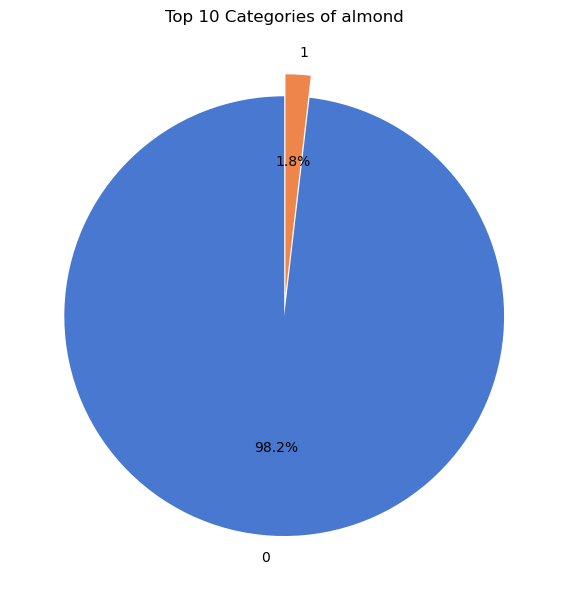

In [23]:
def plot_top_categories_pie_charts(Numerical_Columns, data=df, palette='muted'):
    plt.figure(figsize=(len(Numerical_Columns) * 6, 6))  
    
    # Loop through each column and create a pie chart
    for i, column_name in enumerate(Numerical_Columns):
        plt.subplot(1, len(Numerical_Columns), i + 1)  
        
        # Get the top 10 categories based on frequency
        top_categories = data[column_name].value_counts().nlargest(10)
        
        # Plot the pie chart
        top_categories.plot.pie(autopct='%1.1f%%', colors=sns.color_palette(palette), 
                                 startangle=90, explode=[0.05] * len(top_categories))
        
        plt.title(f'Top 10 Categories of {column_name}')
        plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()


columns_to_plot = ['almond']
plot_top_categories_pie_charts(columns_to_plot)

## ดูความถี่ 10 อันดับที่มากที่สุด

column_name : ตัวแปรจำพวกหมวดหมู่ เช่น จังหวัด (กรุงเทพ, เชียงใหม่, ภูเก็ต) ระดับการศึกษา (ม.6, ป.ตรี, ป.โท) เพศ (Male, Female)

target_column : ตัวแปรเชิงปริมาณ ที่เราต้องการศึกษา เช่น ยอดขาย (Sales) คะแนนความพึงพอใจ (Rating) อายุ (Age) ราคา (Price)

C:\Users\Acer\AppData\Local\Temp\ipykernel_3972\3822364110.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Acer\AppData\Local\Temp\ipykernel_3972\3822364110.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Acer\AppData\Local\Temp\ipykernel_3972\3822364110.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


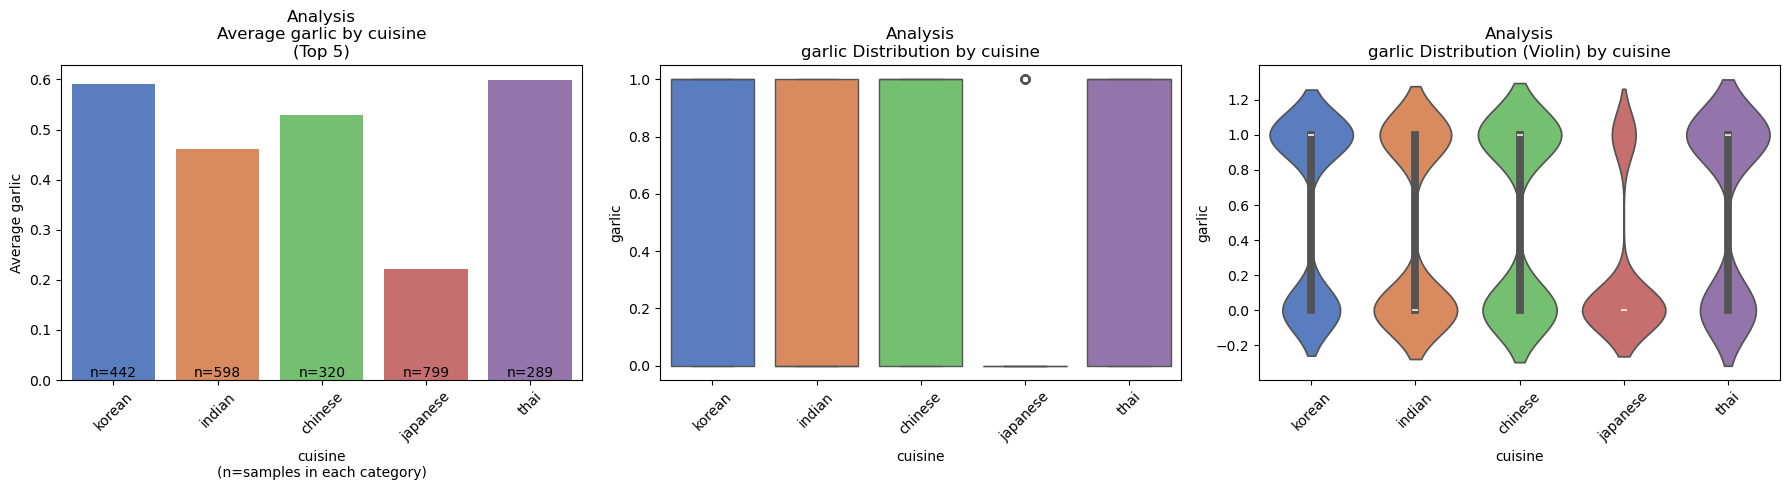

C:\Users\Acer\AppData\Local\Temp\ipykernel_3972\3822364110.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Acer\AppData\Local\Temp\ipykernel_3972\3822364110.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Acer\AppData\Local\Temp\ipykernel_3972\3822364110.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


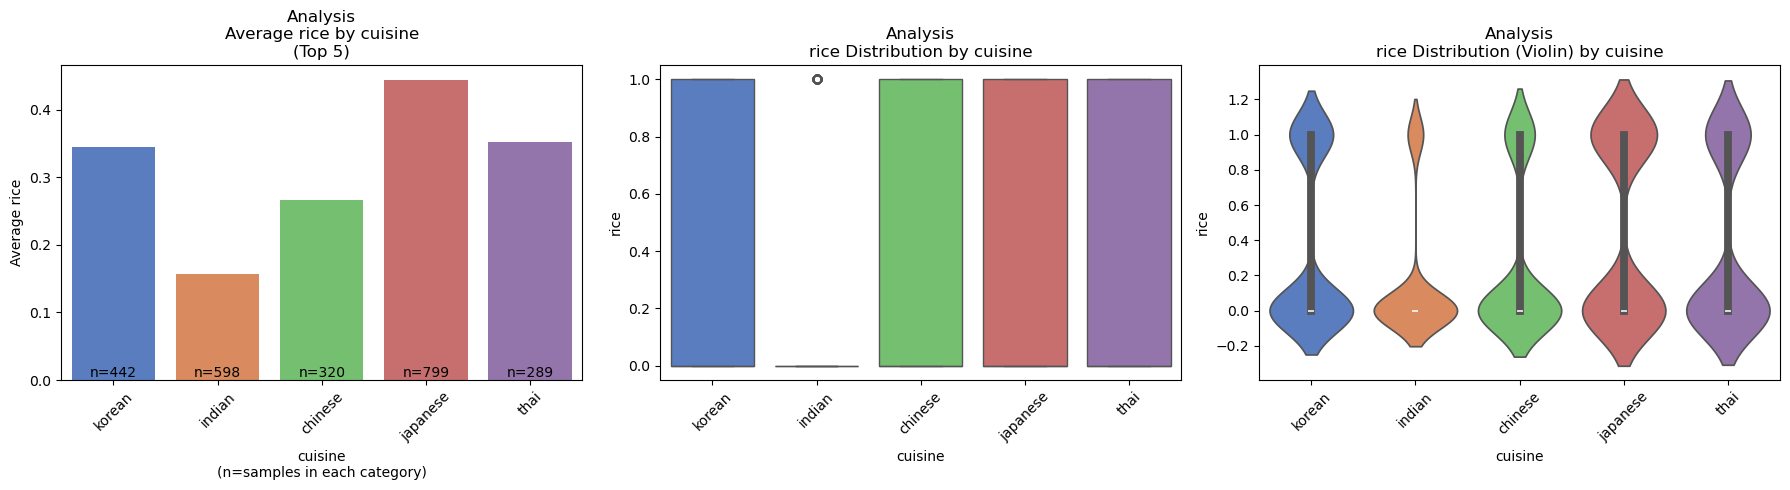

In [ ]:
def plot_categorical_relationships(
    Categorical_Columns: str = "",
    data: pd.DataFrame = None,
    Numerical_Columns: str = "",
    top_n: int = 10,
    title_prefix: str = "Analysis",
    figsize: tuple = (18, 5),
    palette: str = "muted",
    rotation: int = 45,
    min_count: int = 1,
) -> None:
    # Input validation
    if not isinstance(data, pd.DataFrame):
        raise ValueError("data must be a pandas DataFrame")
    if Categorical_Columns not in data.columns:
        raise ValueError(f"Column '{Categorical_Columns}' not found in DataFrame")
    if Numerical_Columns not in data.columns:
        raise ValueError(f"Target column '{Numerical_Columns}' not found in DataFrame")
    if top_n < 1:
        raise ValueError("top_n must be positive")

    # Filter categories with minimum count
    value_counts = data[Categorical_Columns].value_counts()
    valid_categories = value_counts[value_counts >= min_count].head(top_n).index

    # Handle case when no categories meet criteria
    if len(valid_categories) == 0:
        print("No categories meet the minimum count criterion")
        return

    # Filter data
    filtered_data = data[data[Categorical_Columns].isin(valid_categories)].copy()

    # Sort categories by frequency
    category_order = filtered_data[Categorical_Columns].value_counts().index

    # Create figure
    plt.figure(figsize=figsize)

    # Bar Plot
    plt.subplot(1, 3, 1)
    avg_value = (
        filtered_data.groupby(Categorical_Columns)[Numerical_Columns]
        .agg(["mean", "count"])
        .reset_index()
    )
    sns.barplot(
        x=Categorical_Columns,
        y="mean",
        data=avg_value,
        order=category_order,
        palette=palette,
        hue=Categorical_Columns,
        legend=False
    )
    plt.title(
        f"{title_prefix}\nAverage {Numerical_Columns} by {Categorical_Columns}\n(Top {len(valid_categories)})"
    )
    plt.xlabel(f"{Categorical_Columns}\n(n=samples in each category)")
    plt.ylabel(f"Average {Numerical_Columns}")
    plt.xticks(rotation=rotation)

    # Add sample size annotations
    for i, count in enumerate(avg_value["count"]):
        plt.text(i, 0, f"n={count}", ha="center", va="bottom")

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(
        x=Categorical_Columns,
        y=Numerical_Columns,
        data=filtered_data,
        order=category_order,
        palette=palette,
        hue=Categorical_Columns,
        legend=False
    )
    plt.title(f"{title_prefix}\n{Numerical_Columns} Distribution by {Categorical_Columns}")
    plt.xlabel(Categorical_Columns)
    plt.ylabel(Numerical_Columns)
    plt.xticks(rotation=rotation)

    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(
        x=Categorical_Columns,
        y=Numerical_Columns,
        data=filtered_data,
        order=category_order,
        palette=palette,
        hue=Categorical_Columns,
        legend=False
    )
    plt.title(f"{title_prefix}\n{Numerical_Columns} Distribution (Violin) by {Categorical_Columns}")
    plt.xlabel(Categorical_Columns)
    plt.ylabel(Numerical_Columns)
    plt.xticks(rotation=rotation)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


## วัดผล

In [ ]:
# Predict on the test set
if len(y.unique()) >= 2:
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
else:
    print("Error: Insufficient unique classes in the target variable. Cannot perform classification.")

NameError: name 'y' is not defined

In [ ]:
if len(y.unique()) >= 2:
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
# Classification report
if len(y.unique()) >= 2:
    print(classification_report(y_test, y_pred))

### K-Means

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Assuming y is your true labels and y_kmeans is the cluster predictions
# First, you might need to match cluster labels to true labels

def get_cluster_labels(true_labels, predicted_clusters):
    """
    Map cluster labels to the most frequent true label in each cluster
    """
    from scipy import stats
    
    # Create a mapping of clusters to most frequent true labels
    cluster_labels = {}
    for cluster in np.unique(predicted_clusters):
        # Find the most common true label in this cluster
        mask = (predicted_clusters == cluster)
        cluster_true_labels = true_labels[mask]
        cluster_labels[cluster] = stats.mode(cluster_true_labels)[0][0]
    
    # Remap predicted clusters to most frequent true labels
    mapped_predictions = np.array([cluster_labels[cluster] for cluster in predicted_clusters])
    
    return mapped_predictions

# Map cluster predictions to most likely true labels
y_pred_mapped = get_cluster_labels(y, y_kmeans)

# Calculate metrics
print("Accuracy Score:", accuracy_score(y, y_pred_mapped))
print("\nClassification Report:")
print(classification_report(y, y_pred_mapped))
print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred_mapped))